In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error



In [2]:
data = fetch_california_housing(as_frame=True)

In [3]:
data

{'data':        MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
 0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
 1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
 2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
 3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
 4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
 ...       ...       ...       ...  ...       ...       ...        ...
 20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
 20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
 20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
 20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
 20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24
 
 [20640 rows x 8 columns],
 'target': 0        4.526
 1        3.585
 2        3.521
 3        3.413
 4        3.422
          ...  
 2063

In [4]:
X = data.data
y = data.target

In [5]:
X.shape

(20640, 8)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [10]:
print(f'{y.min()*100_100:,.0f} - {y.max()*100_100:,.00f}')

15,014 - 500,501


In [11]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [13]:
rf = RandomForestRegressor(
    n_estimators=200,
    oob_score=True,
    random_state=52,
    n_jobs=-1,
    warm_start=False ## warm state means there is no predefined state : new 
)

In [14]:
rf.fit(X,y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [15]:
y_pred = rf.predict(X)

In [16]:
r2 = r2_score(y, y_pred)

In [26]:
# Mean Average Estimation
mae = mean_absolute_error(y, y_pred)

In [25]:
print(f'R2 (sample): {r2:.4f}')
print(f'MAE: {mae* 100_000}')
print(f'R2 (Validation): {rf.oob_score_:.4f}')

R2 (sample): 0.9749
MAE: 11832.491774951612
R2 (Validation): 0.8158


In [27]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

/var/folders/vl/bc4jn9p97v161wrgq0q7wl340000gn/T/ipykernel_35401/2432382938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


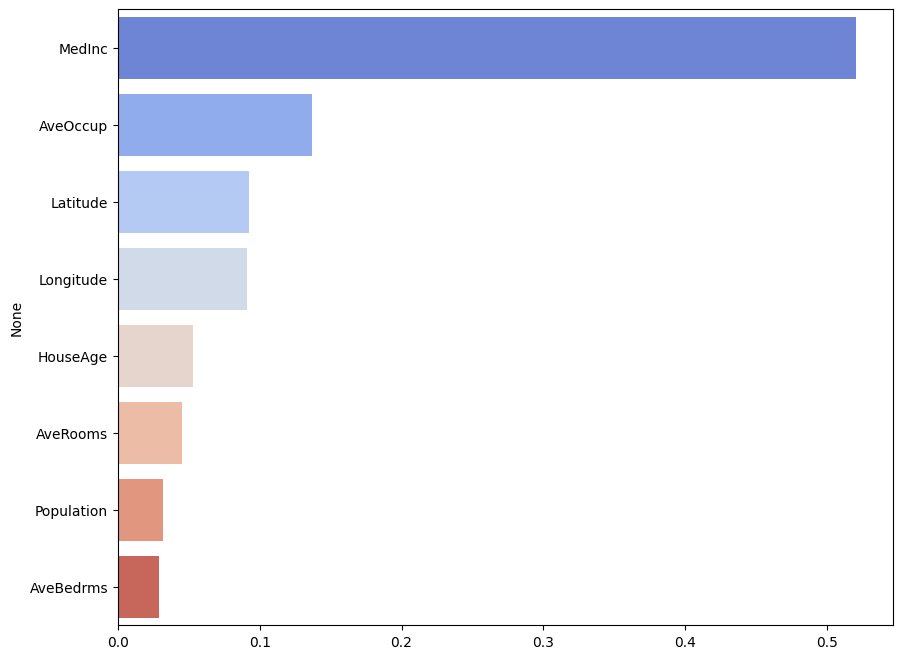

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(
    x=importances[indices],
    y=features[indices],
    palette='coolwarm'
)
plt.show()